<h1 style="text-align: center;">Lab1 Project</h1>
<h1 style="text-align: center;">Coronavirus Analysis</h1>

(This project study about covid, which is one of the most infectious viruses in history)


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Preprocessing continents dataset|100%
|Nguyễn Huy Hoàn|20127166|Preprocessing countries dataset|100%
|Bùi Thanh Lâm|20127402|Question 1: Which countries have had high newcases recently and find the reason.|100%
|Đào Ngọc Hoa|20127500|I. Data Colection, II. Read data and preprocessing|100%
|Võ Thanh Lâm|20127546|Question 2: What are the current trends of covid pandemic among continents?|100%

<a class="anchor" id="1"></a>
## I. Collecting data 

In [37]:
# chose the csv file that have the least null values
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

# read the csv file
csv_file = glob.glob('Date*.csv')
csv_file

# read the csv file
df_list = (pd.read_csv(file) for file in csv_file)
null_list = []
# count the N/A values for each csv file and store it in a list
for df in df_list:
    null_list.append(df.isnull().sum().sum())
print(null_list)
# print the csv file that has the least N/A values
print(csv_file[null_list.index(min(null_list))])
# find the csv file that has the least N/A values
min_index = null_list.index(min(null_list))
# read the csv file that has the least N/A values
df = pd.read_csv(csv_file[min_index])
# df.head()



[1320, 1372, 1352, 1272, 1312, 1262, 1519, 1321, 1400, 1387, 1579, 1320, 1242, 1361, 1525]
Date2023-03-08.csv


In [38]:
# calculate the missing precentage for each column
missing_precentage = df.isnull().sum()/df.shape[0] * 100
# print the missing precentage for each column
print(missing_precentage)

#                       6.477733
Country,Other           0.000000
TotalCases              0.000000
NewCases               56.275304
TotalDeaths             0.000000
NewDeaths              78.947368
TotalRecovered          8.502024
NewRecovered           70.040486
ActiveCases             7.692308
Serious,Critical       42.510121
Tot Cases/1M pop        6.477733
Deaths/1M pop           8.906883
TotalTests             13.765182
Tests/\n1M pop\n       13.765182
Population              6.477733
Continent               1.619433
1 Caseevery X ppl       0.809717
1 Deathevery X ppl      9.716599
1 Testevery X ppl      13.765182
New Cases/1M pop       61.943320
New Deaths/1M pop      84.615385
Active Cases/1M pop    10.526316
Date                    0.000000
dtype: float64


In [39]:
# fill the null in the column New cases with 0
df['NewCases'] = df['NewCases'].fillna(0)
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,"214,606,117","+41,234","1,537,894",178.0,"199,229,181","+29,285","13,839,042","15,548",NaN,NaN,NaN,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08
1,NaN,\nNorth America\n,"124,891,150","+21,644","1,614,399",168.0,"120,229,934","+78,409","3,046,817","7,646",NaN,NaN,NaN,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08
2,NaN,\nEurope\n,"246,769,090","+42,911","2,021,352",249.0,"242,292,644","+64,950","2,455,094","6,478",NaN,NaN,NaN,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08
3,NaN,\nSouth America\n,"68,068,590","+15,243","1,351,063",82.0,"66,312,965","+4,005","404,562","10,188",NaN,NaN,NaN,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08
4,NaN,\nOceania\n,"14,027,544",+149,"26,221",NaN,"13,861,594",NaN,"139,729",55,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08


In [40]:
list_null   = []
list_contries_null = []
# find the countries that have null values in the all columns
for country in df['Country,Other'].unique():
    if df[df['Country,Other'] == country].isnull().sum().sum() > 0:
        list_null.append(df[df['Country,Other'] == country].isnull().sum().sum())
# print(list_null)

# sort descending the list of null values
list_null.sort(reverse=True)
# print the list of null values
print(list_null)
# max number of null values
print(max(list_null))
# print the name of countries that have the most null values
for country in df['Country,Other'].unique():
    if df[df['Country,Other'] == country].isnull().sum().sum() == max(list_null):
        list_contries_null.append(country)
print(list_contries_null)

# oh that the total has the most null values
# so we will drop it
df = df.drop(['TotalCases'], axis=1)
df.head()

[91, 14, 14, 14, 13, 11, 11, 11, 11, 11, 11, 11, 11, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
91
['Total:']


,#,"Country,Other",NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,"+41,234","1,537,894",178.0,"199,229,181","+29,285","13,839,042","15,548",NaN,NaN,NaN,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08
1,NaN,\nNorth America\n,"+21,644","1,614,399",168.0,"120,229,934","+78,409","3,046,817","7,646",NaN,NaN,NaN,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08
2,NaN,\nEurope\n,"+42,911","2,021,352",249.0,"242,292,644","+64,950","2,455,094","6,478",NaN,NaN,NaN,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08
3,NaN,\nSouth America\n,"+15,243","1,351,063",82.0,"66,312,965","+4,005","404,562","10,188",NaN,NaN,NaN,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08
4,NaN,\nOceania\n,+149,"26,221",NaN,"13,861,594",NaN,"139,729",55,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN,2023-03-08


## II. Data Exploration <a class="anchor" id="2"></a>
(*This process is often interleaved with preprocessing*)

**Import libraries**

In [41]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

**Read data**

In [42]:
csv_files = glob.glob("Date*.csv")
csv_files

['Date2023-02-24.csv',
 'Date2023-02-25.csv',
 'Date2023-02-26.csv',
 'Date2023-02-27.csv',
 'Date2023-02-28.csv',
 'Date2023-03-01.csv',
 'Date2023-03-02.csv',
 'Date2023-03-03.csv',
 'Date2023-03-04.csv',
 'Date2023-03-05.csv',
 'Date2023-03-06.csv',
 'Date2023-03-07.csv',
 'Date2023-03-08.csv',
 'Date2023-03-09.csv',
 'Date2023-03-10.csv']

In [43]:
df_list = (pd.read_csv(file) for file in csv_files)

In [44]:
big_df = pd.concat(df_list, ignore_index=True)

In [45]:
big_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date,Tests/\n1M pop\n
0,NaN,\r\nAsia\r\n,"214,177,844","+34,109","1,535,995",199.0,"198,776,221","+42,580","13,865,628","15,540",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN
1,NaN,\r\nNorth America\r\n,"124,454,659","+13,166","1,609,910",100.0,"119,688,106","+39,469","3,156,643","7,752",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN
2,NaN,\r\nEurope\r\n,"246,116,716","+51,474","2,016,321",223.0,"241,707,445","+28,487","2,392,950","6,461",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN
3,NaN,\r\nSouth America\r\n,"67,966,089","+15,202","1,350,361",141.0,"66,204,615","+7,649","411,113","10,195",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN
4,NaN,\r\nOceania\r\n,"13,987,191","+2,961","26,076",16.0,"13,826,284","+2,416","134,831",64,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038,NaN


**The number of rows and columns**

In [46]:
rows, cols = big_df.shape
rows, cols

(3705, 24)

**There are 24 columns and 3458 rows**

| Column | Description | Data Type |
| :------ | :--------- | :--------- |
| # | Index | int64 |
|Country,Other| Country name | object |
|TotalCases| Total number of cases | int64 |
|NewCases| New cases | int64 |
|TotalDeaths| Total number of deaths | int64 |
|NewDeaths| New deaths | int64 |
|TotalRecovered| Total number of recovered cases | int64 |
|ActiveCases| Total number of active cases | int64 |
|Serious,Critical| Total number of serious cases | int64 |
|Tot Cases/1M pop| Total cases per 1 million population | int64 |
|Deaths/1M pop| Total deaths per 1 million population | int64 |
|TotalTests| Total number of tests | int64 |
|Tests/1M pop| Total tests per 1 million population | int64 |
|Population| Population | int64 |
|Continent| Continent name | object |
|1 Caseevery X ppl| 1 case every X people | int64 |
|1 Deathevery X ppl| 1 death every X people | int64 |
|1 Testevery X ppl| 1 test every X people | int64 |
|WHO Region| WHO Region | object |
|NewCases/1M pop| New cases per 1 million population | int64 |
|NewDeaths/1M pop| New deaths per 1 million population | int64 |
|ActiveCases/1M pop| Active cases per 1 million population | int64 |
|NewRecovered/1M pop| New recovered cases per 1 million population | int64 |
|Deaths/1M pop| Deaths per 1 million population | int64 |






**Check missing values**

In [47]:
# check for missing values
big_df.isnull().sum()

# check for duplicates
big_df.duplicated().sum()

0

In [48]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    3465 non-null   float64
 1   Country,Other        3705 non-null   object 
 2   TotalCases           3705 non-null   object 
 3   NewCases             970 non-null    object 
 4   TotalDeaths          3705 non-null   object 
 5   NewDeaths            544 non-null    float64
 6   TotalRecovered       3390 non-null   object 
 7   NewRecovered         912 non-null    object 
 8   ActiveCases          3420 non-null   object 
 9   Serious,Critical     2127 non-null   object 
 10  Tot Cases/1M pop     3465 non-null   object 
 11  Deaths/1M pop        3375 non-null   object 
 12  TotalTests           3195 non-null   object 
 13  Tests/
1M pop
     2556 non-null   object 
 14  Population           3465 non-null   object 
 15  Continent            3645 non-null   obj

*There are some columns having inappropriate data types.*

### Preprocessing

**Convert object to numeric datatypes**

In [49]:
columns = ['TotalCases', 'NewCases', 'TotalDeaths',\
       'TotalRecovered', 'NewRecovered', 'ActiveCases',\
       'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests',\
       'Population', '1 Caseevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop']

In [50]:
big_df[columns] = big_df[columns].apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [51]:
big_df.describe()

,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,3465.000000,3.705000e+03,970.000000,3.615000e+03,544.000000,3.390000e+03,912.000000,3.420000e+03,2127.000000,3465.000000,3375.000000,3.195000e+03,3.435000e+03,3435.000000,3345.000000,3195.000000,356.000000,374.000000,3308.000000
mean,116.000000,1.377376e+07,6609.711340,1.411563e+05,61.056985,1.436844e+07,9672.823465,4.398373e+05,1255.067701,198203.111688,1312.547852,3.260344e+07,3.469404e+07,404.198253,14464.959043,10.725509,97.449438,0.797807,28582.446493
std,66.692956,6.844099e+07,17983.099963,6.829306e+05,122.149089,6.858387e+07,25552.677733,2.421907e+06,5318.458405,200895.995963,1451.141478,1.179720e+08,1.383546e+08,4138.659291,57101.136000,26.697019,256.348564,1.836199,91606.597997
min,1.000000,5.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,16.000000,2.000000,7.850000e+03,7.990000e+02,1.000000,153.000000,0.000000,1.000000,0.010000,1.000000
25%,58.000000,2.537500e+04,23.000000,2.270000e+02,3.000000,2.327600e+04,32.000000,5.600000e+01,4.000000,17228.000000,175.000000,3.478150e+05,4.454310e+05,3.000000,499.000000,0.000000,4.000000,0.100000,55.000000
50%,116.000000,2.510710e+05,171.000000,2.805000e+03,11.000000,3.079295e+05,263.500000,1.327000e+03,17.000000,124778.000000,818.000000,2.226216e+06,5.797805e+06,8.000000,1255.000000,1.000000,13.000000,0.400000,540.500000
75%,174.000000,2.037773e+06,3411.500000,1.987800e+04,60.500000,2.439497e+06,3696.000000,1.419900e+04,74.000000,328416.000000,2064.000000,1.303543e+07,2.210284e+07,58.000000,6120.000000,5.000000,93.250000,0.700000,3293.000000
max,231.000000,6.812958e+08,134557.000000,6.810330e+06,705.000000,6.541880e+08,177791.000000,2.044346e+07,40670.000000,874039.000000,8737.000000,1.168472e+09,1.448471e+09,62616.000000,626161.000000,196.000000,3083.000000,20.000000,611101.000000


**Convert `Date` to datatime type**

In [52]:
big_df['Date'] = pd.to_datetime(big_df['Date']).dt.date

# Countries

In [53]:
countries_df = big_df.dropna(subset=['#'])
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date,Tests/\n1M pop\n
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,347.0,4.0,1.600000e+08,"110,461",1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-24,NaN
9,2.0,USA,105169945,8922.0,1144441.0,73.0,102567861.0,34979.0,1457643.0,2588.0,314123.0,3418.0,1.164028e+09,"3,476,731",3.348053e+08,North America,3.0,293.0,0.0,27.0,0.2,4354.0,2023-02-24,NaN
10,3.0,India,44685799,180.0,530764.0,NaN,44152945.0,106.0,2090.0,NaN,31768.0,377.0,9.183245e+08,"652,854",1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,1.0,2023-02-24,NaN
11,4.0,France,39608954,3917.0,164877.0,29.0,39374920.0,3293.0,69157.0,869.0,603938.0,2514.0,2.714902e+08,"4,139,547",6.558452e+07,Europe,2.0,398.0,0.0,60.0,0.4,1054.0,2023-02-24,NaN
12,5.0,Germany,38111063,20974.0,167812.0,89.0,37654800.0,NaN,288451.0,NaN,454333.0,2001.0,1.223324e+08,"1,458,359",8.388360e+07,Europe,2.0,500.0,1.0,250.0,1.0,3439.0,2023-02-24,NaN


**Values distribution of Numeric columns**

In [54]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,3465.0,1.160000e+02,6.669296e+01,1.00,58.0,116.0,174.00,2.310000e+02,6.5
TotalCases,3465.0,2.945558e+06,9.548297e+06,5.00,23948.0,206673.0,1304132.00,1.055478e+08,6.5
NewCases,786.0,1.631405e+03,3.766162e+03,1.00,16.0,103.5,618.75,3.297000e+04,78.8
TotalDeaths,3375.0,3.023881e+04,1.059505e+05,1.00,225.0,2179.0,14452.00,1.148391e+06,8.9
NewDeaths,382.0,1.739005e+01,2.801607e+01,1.00,2.0,6.0,17.00,1.580000e+02,89.7
TotalRecovered,3150.0,3.020371e+06,9.604788e+06,2.00,21596.0,235145.5,1473281.25,1.030838e+08,15.0
NewRecovered,737.0,2.399514e+03,7.113609e+03,1.00,17.0,140.0,1278.00,7.832000e+04,80.1
ActiveCases,3180.0,8.864015e+04,7.963759e+05,0.00,53.0,1053.0,10152.00,1.153536e+07,14.2
"Serious,Critical",1887.0,1.261797e+02,6.487421e+02,1.00,4.0,13.0,52.00,7.557000e+03,49.1
Tot Cases/1M pop,3435.0,1.957411e+05,1.966302e+05,16.00,17214.0,124778.0,314971.00,7.039590e+05,7.3


In [55]:
df = df.sort_values(by='missing_percentage', ascending=False)
df


,count,mean,std,min,25%,50%,75%,max,missing_percentage
New Cases/1M pop,356.0,9.744944e+01,2.563486e+02,1.00,4.0,13.0,93.25,3.083000e+03,90.4
New Deaths/1M pop,374.0,7.978075e-01,1.836199e+00,0.01,0.1,0.4,0.70,2.000000e+01,89.9
NewDeaths,382.0,1.739005e+01,2.801607e+01,1.00,2.0,6.0,17.00,1.580000e+02,89.7
NewRecovered,737.0,2.399514e+03,7.113609e+03,1.00,17.0,140.0,1278.00,7.832000e+04,80.1
NewCases,786.0,1.631405e+03,3.766162e+03,1.00,16.0,103.5,618.75,3.297000e+04,78.8
"Serious,Critical",1887.0,1.261797e+02,6.487421e+02,1.00,4.0,13.0,52.00,7.557000e+03,49.1
TotalRecovered,3150.0,3.020371e+06,9.604788e+06,2.00,21596.0,235145.5,1473281.25,1.030838e+08,15.0
ActiveCases,3180.0,8.864015e+04,7.963759e+05,0.00,53.0,1053.0,10152.00,1.153536e+07,14.2
TotalTests,3195.0,3.260344e+07,1.179720e+08,7850.00,347815.0,2226216.0,13035429.50,1.168472e+09,13.8
1 Testevery X ppl,3195.0,1.072551e+01,2.669702e+01,0.00,0.0,1.0,5.00,1.960000e+02,13.8


In [56]:
# if the missing percentage is more than 80%, drop the column
# because it is not useful for analysis, in covid-19 case study we have 2 columns
# with missing percentage more than 80%
df[df['missing_percentage'] > 80]

# drop the columns


,count,mean,std,min,25%,50%,75%,max,missing_percentage
New Cases/1M pop,356.0,97.449438,256.348564,1.00,4.0,13.0,93.25,3083.0,90.4
New Deaths/1M pop,374.0,0.797807,1.836199,0.01,0.1,0.4,0.70,20.0,89.9
NewDeaths,382.0,17.390052,28.016066,1.00,2.0,6.0,17.00,158.0,89.7
NewRecovered,737.0,2399.514247,7113.609356,1.00,17.0,140.0,1278.00,78320.0,80.1


**Values distribution of Catergorial columns**

In [57]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Tests/\r\n1M pop\r\n,Continent,Date,Tests/\n1M pop\n
missing_percentage,0.0,26.2,0.9,0.0,81.6
num_values,231,500,6,15,249
value_percentages,"{'China': 0.4, 'Mauritania': 0.4, 'Bhutan': 0.4, 'Syria': 0.4, 'Burundi': 0.4, 'Seychelles': 0.4...","{'110,461': 0.5, '2,072,951': 0.5, '64,946': 0.5, '30,959': 0.5, '340,182': 0.5, '885,119': 0.5,...","{'Africa': 25.3, 'Asia': 21.8, 'Europe': 21.0, 'North America': 17.0, 'Australia/Oceania': 8.7, ...","{2023-02-24: 6.7, 2023-02-25: 6.7, 2023-02-26: 6.7, 2023-02-27: 6.7, 2023-02-28: 6.7, 2023-03-01...","{'110,461': 0.5, '15,802,409': 0.5, '404,398': 0.5, '340,182': 0.5, '885,119': 0.5, '909,567': 0..."


<a class="anchor" id="3.1"></a>
# Question 1: <center>Which countries have had high newcases recently? Why?</center> 
**Introduction:**
The background (academics environment and current situation) can influence either positively or negatively a person’s mental well-being. These factors can be current year of study, marial status, age, ...  In this project, we would like to study the relationship between students' background and their mental health issues. Finding this connection would help schools give useful advices for students as well as prepare mental health support for students.

**Step summary:**
1. [...](#3.1.1)
2. [...](#3.1.2)
3. [...](#3.1.3)
4. [...](#3.1.4)
5. [...](#3.1.5)
6. [...](#3.1.6)
7. [...](#3.1.7)

# Continents

In [58]:
continents_df = big_df[(big_df['#'].isna())&((big_df['Country,Other']!='Total:')\
                                             &(big_df['Country,Other']!='\n\n'))&(big_df['Continent']!='All')]
continents_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date,Tests/\n1M pop\n
0,NaN,\r\nAsia\r\n,214177844,34109.0,1535995.0,199.0,198776221.0,42580.0,13865628.0,15540.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN
1,NaN,\r\nNorth America\r\n,124454659,13166.0,1609910.0,100.0,119688106.0,39469.0,3156643.0,7752.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN
2,NaN,\r\nEurope\r\n,246116716,51474.0,2016321.0,223.0,241707445.0,28487.0,2392950.0,6461.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN
3,NaN,\r\nSouth America\r\n,67966089,15202.0,1350361.0,141.0,66204615.0,7649.0,411113.0,10195.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN
4,NaN,\r\nOceania\r\n,13987191,2961.0,26076.0,16.0,13826284.0,2416.0,134831.0,64.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24,NaN


**Values distribution of Numeric columns**

In [59]:
df = continents_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
TotalCases,102.0,1.000623e+08,9.374840e+07,721.0,12799627.00,68047315.5,2.143043e+08,246818193.0,97.2
NewCases,77.0,1.665304e+04,1.672066e+04,1.0,1301.00,13672.0,2.905500e+04,58588.0,97.9
TotalDeaths,102.0,1.000548e+06,7.824491e+05,15.0,26221.00,1350933.0,1.611602e+06,2021620.0,97.2
NewDeaths,66.0,1.006515e+02,8.179684e+01,1.0,19.25,87.5,1.695000e+02,297.0,98.2
TotalRecovered,102.0,9.606577e+07,9.002242e+07,706.0,12077257.00,66297555.0,1.989408e+08,242384722.0,97.2
NewRecovered,79.0,2.235977e+04,2.249691e+04,1.0,1040.00,20525.0,3.893700e+04,86931.0,97.9
ActiveCases,102.0,2.996000e+06,4.663098e+06,0.0,139711.75,461363.5,3.089002e+06,13865628.0,97.2
"Serious,Critical",102.0,5.959382e+03,5.518717e+03,0.0,64.00,6482.5,1.018575e+04,15548.0,97.2
Tot Cases/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


**Values distribution of Catergorial columns**

In [60]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Tests/\r\n1M pop\r\n,Continent,Date,Tests/\n1M pop\n
missing_percentage,0.0,26.2,0.9,0.0,81.6
num_values,231,500,6,15,249
value_percentages,"{'China': 0.4, 'Mauritania': 0.4, 'Bhutan': 0.4, 'Syria': 0.4, 'Burundi': 0.4, 'Seychelles': 0.4...","{'110,461': 0.5, '2,072,951': 0.5, '64,946': 0.5, '30,959': 0.5, '340,182': 0.5, '885,119': 0.5,...","{'Africa': 25.3, 'Asia': 21.8, 'Europe': 21.0, 'North America': 17.0, 'Australia/Oceania': 8.7, ...","{2023-02-24: 6.7, 2023-02-25: 6.7, 2023-02-26: 6.7, 2023-02-27: 6.7, 2023-02-28: 6.7, 2023-03-01...","{'110,461': 0.5, '15,802,409': 0.5, '404,398': 0.5, '340,182': 0.5, '885,119': 0.5, '909,567': 0..."


### **Top 10 Countries** ###

In [65]:
Top10_TotalCases = countries_df.drop([8],axis = 0)
Top10_TotalCases.rename(columns ={'Country,Other':'Country'}, inplace = True)
Top10_TotalCases = Top10_TotalCases.head(10)
Top10_TotalCases

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date,Tests/\n1M pop\n
9,2.0,USA,105169945,8922.0,1144441.0,73.0,102567861.0,34979.0,1457643.0,2588.0,314123.0,3418.0,1.164028e+09,"3,476,731",3.348053e+08,North America,3.0,293.0,0.0,27.0,0.2,4354.0,2023-02-24,NaN
10,3.0,India,44685799,180.0,530764.0,NaN,44152945.0,106.0,2090.0,NaN,31768.0,377.0,9.183245e+08,"652,854",1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,1.0,2023-02-24,NaN
11,4.0,France,39608954,3917.0,164877.0,29.0,39374920.0,3293.0,69157.0,869.0,603938.0,2514.0,2.714902e+08,"4,139,547",6.558452e+07,Europe,2.0,398.0,0.0,60.0,0.4,1054.0,2023-02-24,NaN
12,5.0,Germany,38111063,20974.0,167812.0,89.0,37654800.0,NaN,288451.0,NaN,454333.0,2001.0,1.223324e+08,"1,458,359",8.388360e+07,Europe,2.0,500.0,1.0,250.0,1.0,3439.0,2023-02-24,NaN
13,6.0,Brazil,37020531,11587.0,698928.0,94.0,36185975.0,6329.0,135628.0,NaN,171906.0,3245.0,6.377617e+07,"296,146",2.153536e+08,South America,6.0,308.0,3.0,54.0,0.4,630.0,2023-02-24,NaN
14,7.0,Japan,33157721,6512.0,72134.0,83.0,21675630.0,2474.0,11409957.0,183.0,264026.0,574.0,9.482713e+07,"755,084",1.255848e+08,Asia,4.0,1741.0,1.0,52.0,0.7,90855.0,2023-02-24,NaN
15,8.0,S. Korea,30479753,10051.0,33929.0,20.0,30229352.0,5828.0,216472.0,183.0,593801.0,661.0,1.580406e+07,"307,892",5.132990e+07,Asia,2.0,1513.0,3.0,196.0,0.4,4217.0,2023-02-24,NaN
16,9.0,Italy,25576852,NaN,188094.0,NaN,25219653.0,NaN,169105.0,133.0,424422.0,3121.0,2.676632e+08,"4,441,601",6.026277e+07,Europe,2.0,320.0,0.0,NaN,NaN,2806.0,2023-02-24,NaN
17,10.0,UK,24341615,NaN,206246.0,NaN,24076386.0,2442.0,58983.0,NaN,355363.0,3011.0,5.225265e+08,"7,628,357",6.849791e+07,Europe,3.0,332.0,0.0,NaN,NaN,861.0,2023-02-24,NaN
18,11.0,Russia,22232492,13829.0,395970.0,32.0,21570255.0,12618.0,266267.0,NaN,152480.0,2716.0,2.734000e+08,"1,875,095",1.458059e+08,Europe,7.0,368.0,1.0,95.0,0.2,1826.0,2023-02-24,NaN


### **Overall comments based on TotalCases, TotalRecovered, TotalDeaths, ActiveCases** ###

<AxesSubplot:xlabel='Country'>

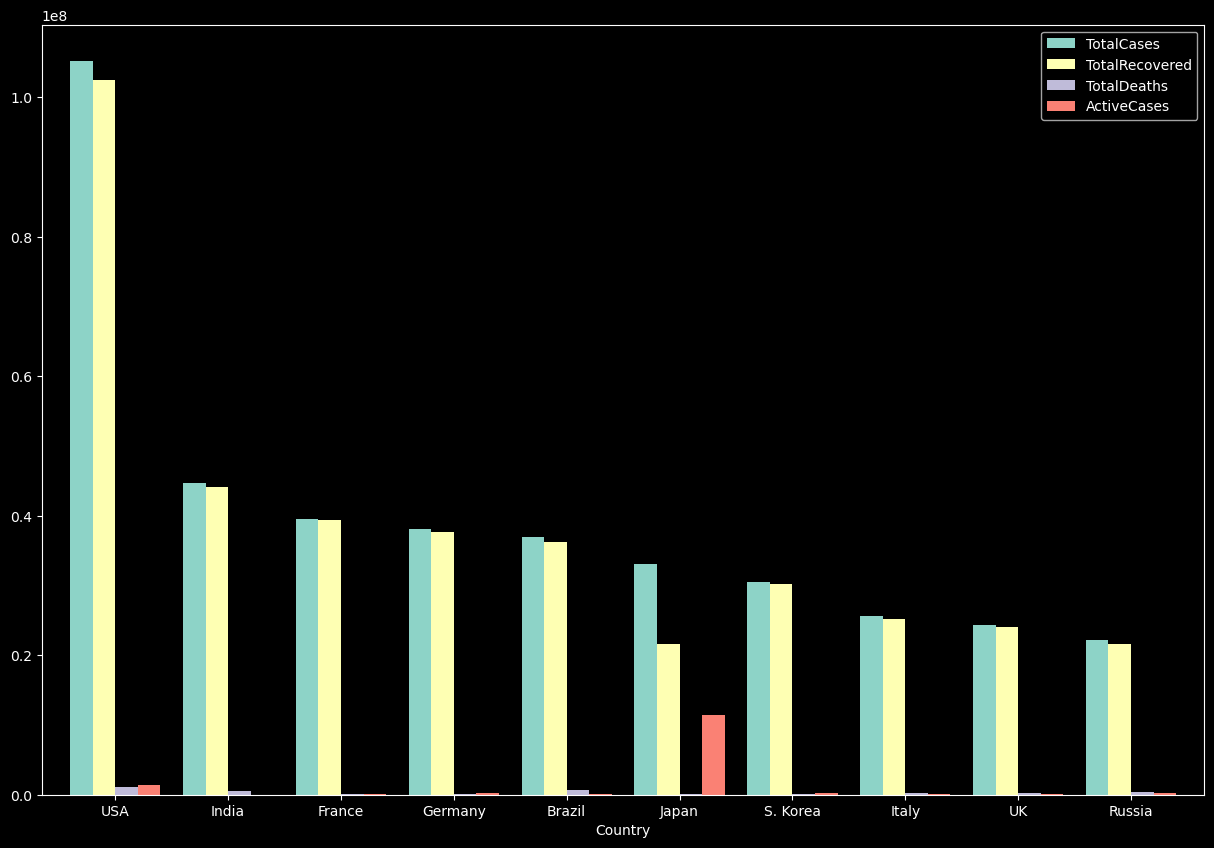

In [66]:
df = Top10_TotalCases[['Country','TotalCases', 'TotalRecovered', 'TotalDeaths','ActiveCases']]
df = df.set_index('Country')
df.plot.bar(rot=0,width=0.8,figsize=(15,10))

- We can see that the recovery rate after contracting the disease in almost all countries is quite good. We can observe that the recovery rate of countries such as **Italy, the UK, France, and South Korea** are almost equal. In addition, other countries also achieve very high recovery rates, which shows that the level of post-pandemic recovery as well as the level of healthcare and disease prevention capabilities in these countries are very high
- The mortality rate in countries is low and stable with no signs of increasing, and still exists in countries such as the **US, Brazil, and India.**.
- The proportion of cases still under treatment in **Japan** is quite high, and this proportion is also inversely proportional to the proportion of post-disease recovery cases in **Japan**, which shows that the pandemic situation in this country is still tense. Meanwhile, in **other countries**, this proportion is stable, and the pandemic is well controlled


<a class="anchor" id="3.2"></a>
# Question 2. <center>What are the current trends of covid pandemic among continents?</center> 

**Introduction**
As we think, a student would find the support from specialists when they have any symtoms of `anxiety`,`depression`,`panic attack`. However, this fact raise the question that whether they would have as we think in the real world? Therefore, we would find the answer for this question and from this, we can give useful advices for students to care more about their mental health.

**Step summary:**
1. **Mental health issues analysis**
2. **Preprocessing**
3. **Visualization**
4. **Modeling**

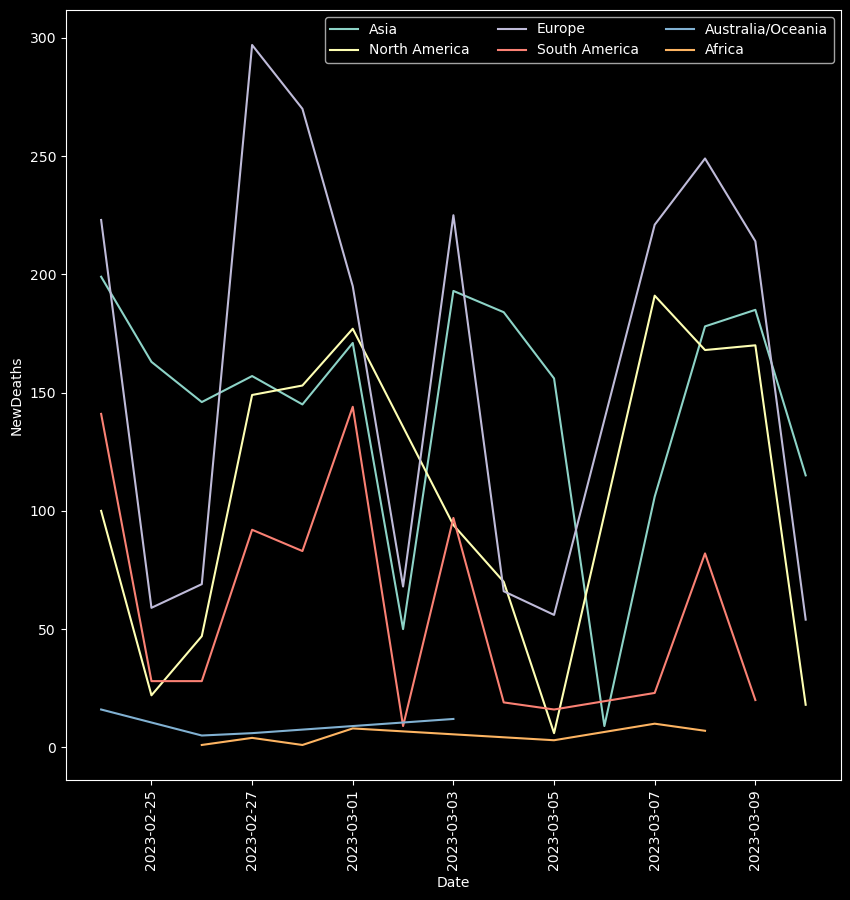

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Date", y="NewDeaths",
             hue="Continent", data=continents_df)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

(array([19413., 19415., 19417., 19419., 19421., 19423., 19425.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

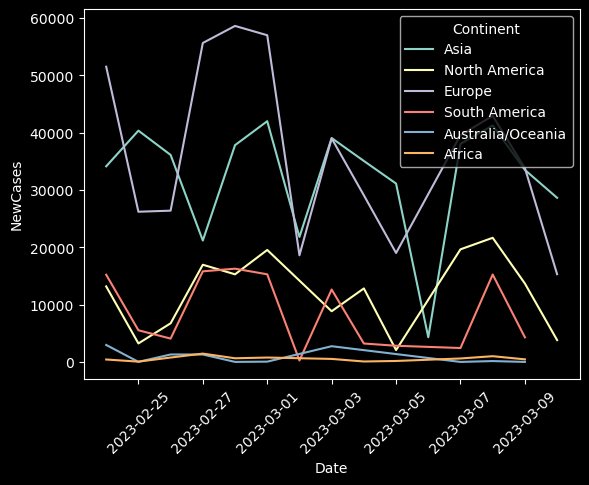

In [ ]:
sns.lineplot(x="Date", y="NewCases",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

(array([19413., 19415., 19417., 19419., 19421., 19423., 19425.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

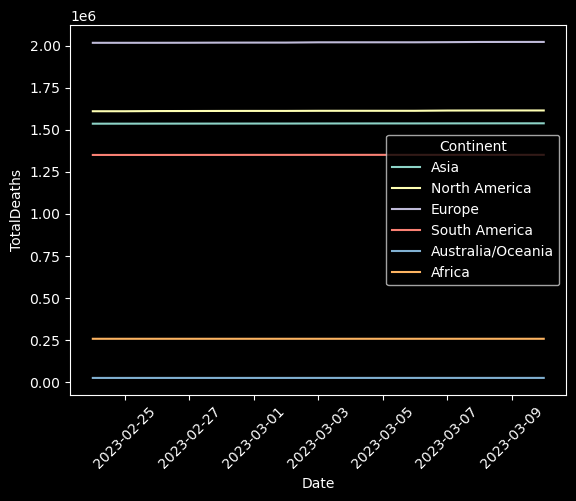

In [ ]:
sns.lineplot(x="Date", y="TotalDeaths",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

In [ ]:
tmp_df =countries_df.groupby(['Date','Continent']).Population.sum().reset_index()
tmp_df

,Date,Continent,Population
0,2023-02-24,Africa,1.406729e+09
1,2023-02-24,Asia,4.711357e+09
2,2023-02-24,Australia/Oceania,4.347041e+07
3,2023-02-24,Europe,7.475438e+08
4,2023-02-24,North America,5.981409e+08
...,...,...,...
85,2023-03-10,Asia,4.711357e+09
86,2023-03-10,Australia/Oceania,4.347041e+07
87,2023-03-10,Europe,7.475438e+08
88,2023-03-10,North America,5.981409e+08


<AxesSubplot:xlabel='Continent', ylabel='Population'>

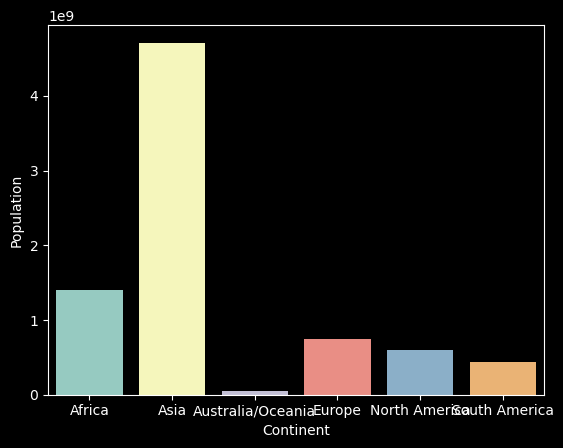

In [ ]:
sns.barplot(data=tmp_df, x="Continent", y="Population")

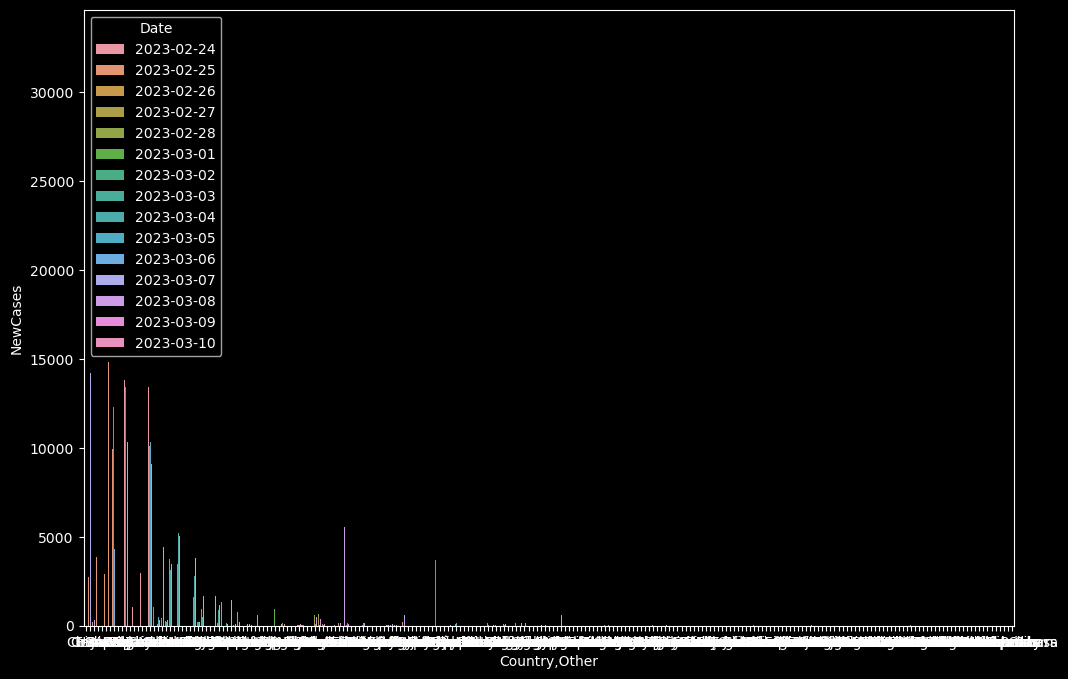

In [ ]:
f = plt.figure(figsize=(12, 8))
fig = sns.barplot(data=countries_df, x = 'Country,Other', y = 'NewCases',hue='Date')

In [ ]:
df = countries_df[countries_df['Date']==datetime.date.today()]

NameError: name 'datetime' is not defined

In [ ]:
countries_df[countries_df['Serious,Critical'] > 3000]